In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/07_Jul.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,27.000000,88.000000,1,7,0,2778.0,2758.0,2777.0,2320.0,2364.0,2761.0,2777.166667,2830.0
1,27.000000,88.333333,1,7,0,2765.0,2759.0,2761.0,2326.0,2340.0,2731.0,2780.500000,2801.0
2,27.000000,88.666667,1,7,0,2794.0,2748.0,2787.0,2322.0,2347.0,2709.0,2782.416667,2810.0
3,27.000000,89.000000,1,7,0,2815.0,2769.0,2762.0,2293.0,2342.0,2695.0,2783.500000,2775.0
4,27.000000,89.333333,2,7,0,2830.0,2778.0,2758.0,2280.0,2326.0,2723.0,2783.833333,2762.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8827,30.182451,81.141470,23,3,1,3767.0,3695.0,3605.0,3638.0,3110.0,3235.0,3709.500000,3804.0
8828,30.182451,81.141470,24,3,1,3767.0,3669.0,3626.0,3658.0,3123.0,3225.0,3720.500000,3758.0
8829,30.182451,81.141470,24,3,1,3760.0,3690.0,3608.0,3653.0,3115.0,3253.0,3728.416667,3703.0
8830,30.272451,81.141470,24,3,1,3789.0,3713.0,3626.0,3633.0,3178.0,3257.0,3741.000000,3777.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8832 non-null   float64
 1   Hum     8832 non-null   float64
 2   A       8832 non-null   int64  
 3   B       8832 non-null   int64  
 4   C       8832 non-null   int64  
 5   D       8832 non-null   float64
 6   E       8832 non-null   float64
 7   F       8832 non-null   float64
 8   G       8832 non-null   float64
 9   H       8832 non-null   float64
 10  I       8832 non-null   float64
 11  J       8832 non-null   float64
 12  Cons    8832 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 897.1 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8832 non-null   float64
 1   Hum     8832 non-null   float64
 2   A       8832 non-null   float64
 3   B       8832 non-null   float64
 4   C       8832 non-null   float64
 5   D       8832 non-null   float64
 6   E       8832 non-null   float64
 7   F       8832 non-null   float64
 8   G       8832 non-null   float64
 9   H       8832 non-null   float64
 10  I       8832 non-null   float64
 11  J       8832 non-null   float64
 12  Cons    8832 non-null   float64
dtypes: float64(13)
memory usage: 897.1 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 4992][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.176809,-1.375988,1.265240,-1.660699,1.484366,-1.373971,-1.318088,-1.369817,-1.314181,-2.380970,-2.027975,-0.945477,-1.374702
1,-1.257149,-1.375988,1.292633,-1.660699,1.484366,-1.373971,-1.354087,-1.367050,-1.358415,-2.365267,-2.086388,-1.015307,-1.365086
2,-1.232216,-1.375988,1.320027,-1.660699,1.484366,-1.373971,-1.273782,-1.397482,-1.286534,-2.375736,-2.069351,-1.066515,-1.359556
3,-1.329179,-1.375988,1.347420,-1.660699,1.484366,-1.373971,-1.215630,-1.339384,-1.355650,-2.451636,-2.081520,-1.099103,-1.356431
4,-1.365194,-1.375988,1.374813,-1.516262,1.484366,-1.373971,-1.174093,-1.314485,-1.366709,-2.485660,-2.120463,-1.033928,-1.355469


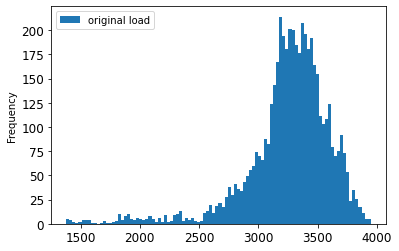

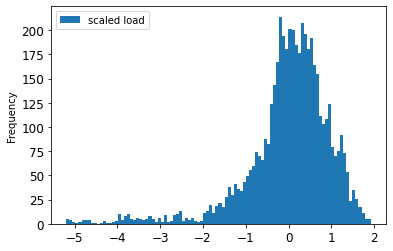

In [9]:
stlf_data[stlf_data.index <= 4992][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4992][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

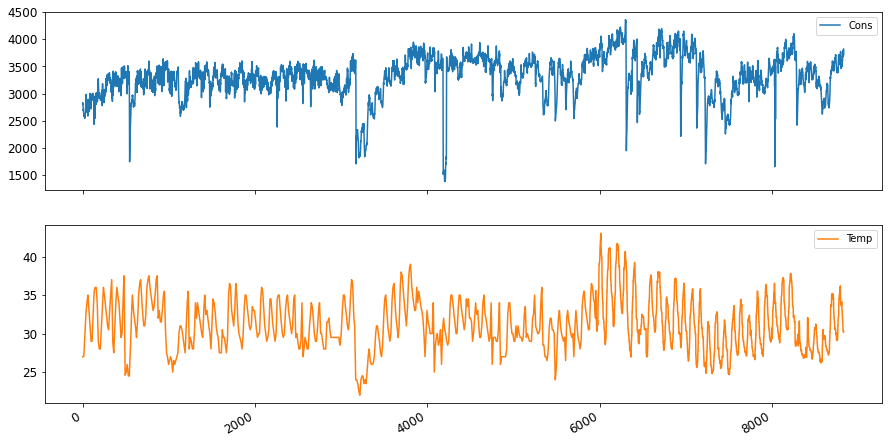

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,-1.176809,-1.375988,1.265240,-1.660699,1.484366,-1.373971,-1.318088,-1.369817,-1.314181,-2.380970,-2.027975,-0.945477,-1.374702,-1.257149
1,-1.257149,-1.375988,1.292633,-1.660699,1.484366,-1.373971,-1.354087,-1.367050,-1.358415,-2.365267,-2.086388,-1.015307,-1.365086,-1.232216
2,-1.232216,-1.375988,1.320027,-1.660699,1.484366,-1.373971,-1.273782,-1.397482,-1.286534,-2.375736,-2.069351,-1.066515,-1.359556,-1.329179
3,-1.329179,-1.375988,1.347420,-1.660699,1.484366,-1.373971,-1.215630,-1.339384,-1.355650,-2.451636,-2.081520,-1.099103,-1.356431,-1.365194
4,-1.365194,-1.375988,1.374813,-1.516262,1.484366,-1.373971,-1.174093,-1.314485,-1.366709,-2.485660,-2.120463,-1.033928,-1.355469,-1.395668
5,-1.395668,-1.375988,1.402207,-1.516262,1.484366,-1.373971,-1.254398,-1.350451,-1.363944,-2.496128,-2.200781,-1.178243,-1.357392,-1.567432
6,-1.567432,-1.375988,1.429600,-1.516262,1.484366,-1.373971,-1.229476,-1.270220,-1.394356,-2.530152,-2.152103,-1.215486,-1.371577,-1.512024
7,-1.512024,-1.375988,1.456993,-1.516262,1.484366,-1.373971,-1.326396,-1.212121,-1.336298,-2.517066,-2.159405,-1.296954,-1.386002,-1.570202
8,-1.570202,-1.375988,1.484387,-1.371824,1.484366,-1.373971,-1.362395,-1.170623,-1.311416,-2.572028,-2.154537,-1.436613,-1.407639,-1.584054
9,-1.584054,-1.375988,1.511780,-1.371824,1.484366,-1.373971,-1.392855,-1.250854,-1.347357,-2.598200,-2.205649,-1.720588,-1.427353,-1.631150


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-1.176809,-1.375988,1.265240,-1.660699,1.484366,-1.373971,-1.318088,-1.369817,-1.314181,-2.380970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.176809
1,-1.257149,-1.375988,1.292633,-1.660699,1.484366,-1.373971,-1.354087,-1.367050,-1.358415,-2.365267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.176809,-1.257149
2,-1.232216,-1.375988,1.320027,-1.660699,1.484366,-1.373971,-1.273782,-1.397482,-1.286534,-2.375736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.176809,-1.257149,-1.232216
3,-1.329179,-1.375988,1.347420,-1.660699,1.484366,-1.373971,-1.215630,-1.339384,-1.355650,-2.451636,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.176809,-1.257149,-1.232216,-1.329179
4,-1.365194,-1.375988,1.374813,-1.516262,1.484366,-1.373971,-1.174093,-1.314485,-1.366709,-2.485660,...,NaN,NaN,NaN,NaN,NaN,-1.176809,-1.257149,-1.232216,-1.329179,-1.365194
5,-1.395668,-1.375988,1.402207,-1.516262,1.484366,-1.373971,-1.254398,-1.350451,-1.363944,-2.496128,...,NaN,NaN,NaN,NaN,-1.176809,-1.257149,-1.232216,-1.329179,-1.365194,-1.395668
6,-1.567432,-1.375988,1.429600,-1.516262,1.484366,-1.373971,-1.229476,-1.270220,-1.394356,-2.530152,...,NaN,NaN,NaN,-1.176809,-1.257149,-1.232216,-1.329179,-1.365194,-1.395668,-1.567432
7,-1.512024,-1.375988,1.456993,-1.516262,1.484366,-1.373971,-1.326396,-1.212121,-1.336298,-2.517066,...,NaN,NaN,-1.176809,-1.257149,-1.232216,-1.329179,-1.365194,-1.395668,-1.567432,-1.512024
8,-1.570202,-1.375988,1.484387,-1.371824,1.484366,-1.373971,-1.362395,-1.170623,-1.311416,-2.572028,...,NaN,-1.176809,-1.257149,-1.232216,-1.329179,-1.365194,-1.395668,-1.567432,-1.512024,-1.570202
9,-1.584054,-1.375988,1.511780,-1.371824,1.484366,-1.373971,-1.392855,-1.250854,-1.347357,-2.598200,...,-1.176809,-1.257149,-1.232216,-1.329179,-1.365194,-1.395668,-1.567432,-1.512024,-1.570202,-1.584054


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,-1.631150,-1.375988,1.539173,-1.371824,1.484366,-1.373971,-1.564542,-1.225954,-1.267182,-2.595583,...,-1.257149,-1.232216,-1.329179,-1.365194,-1.395668,-1.567432,-1.512024,-1.570202,-1.584054,-1.631150
11,-1.694869,-1.375988,1.566567,-1.371824,1.484366,-1.373971,-1.509159,-1.322785,-1.209124,-2.616521,...,-1.232216,-1.329179,-1.365194,-1.395668,-1.567432,-1.512024,-1.570202,-1.584054,-1.631150,-1.694869
12,-1.711491,-1.375988,1.593960,-1.227387,1.484366,-1.373971,-1.567311,-1.358750,-1.167654,-2.705507,...,-1.329179,-1.365194,-1.395668,-1.567432,-1.512024,-1.570202,-1.584054,-1.631150,-1.694869,-1.711491
13,-1.836158,-1.307250,1.504932,-1.227387,1.484366,-1.373971,-1.581157,-1.389183,-1.247829,-2.736913,...,-1.365194,-1.395668,-1.567432,-1.512024,-1.570202,-1.584054,-1.631150,-1.694869,-1.711491,-1.836158
14,-1.805684,-1.238511,1.415903,-1.227387,1.484366,-1.373971,-1.628233,-1.560711,-1.222947,-2.810196,...,-1.395668,-1.567432,-1.512024,-1.570202,-1.584054,-1.631150,-1.694869,-1.711491,-1.836158,-1.805684


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 10 to 4991
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  4982 non-null   float64
 1   Temp           4982 non-null   float64
 2   Hum            4982 non-null   float64
 3   A              4982 non-null   float64
 4   B              4982 non-null   float64
 5   C              4982 non-null   float64
 6   D              4982 non-null   float64
 7   E              4982 non-null   float64
 8   F              4982 non-null   float64
 9   G              4982 non-null   float64
 10  H              4982 non-null   float64
 11  I              4982 non-null   float64
 12  J              4982 non-null   float64
 13  y_t+1          4982 non-null   float64
 14  Cons_t-10      4982 non-null   float64
 15  Cons_t-9       4982 non-null   float64
 16  Cons_t-8       4982 non-null   float64
 17  Cons_t-7       4982 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
10,-1.694869
11,-1.711491
12,-1.836158
13,-1.805684
14,-1.800143
...,...
4987,0.560217
4988,0.715359
4989,1.075508
4990,0.718129


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,-1.631150,-1.631150,-1.584054,-1.570202,-1.512024,-1.567432,-1.395668,-1.365194,-1.329179,-1.232216,...,-1.371824,1.484366,-1.373971,-1.564542,-1.225954,-1.267182,-2.595583,-2.303005,-1.743865,-1.458126
11,-1.694869,-1.694869,-1.631150,-1.584054,-1.570202,-1.512024,-1.567432,-1.395668,-1.365194,-1.329179,...,-1.371824,1.484366,-1.373971,-1.509159,-1.322785,-1.209124,-2.616521,-2.217819,-1.841626,-1.499477
12,-1.711491,-1.711491,-1.694869,-1.631150,-1.584054,-1.570202,-1.512024,-1.567432,-1.395668,-1.365194,...,-1.227387,1.484366,-1.373971,-1.567311,-1.358750,-1.167654,-2.705507,-2.281100,-1.832316,-1.545877
13,-1.836158,-1.836158,-1.711491,-1.694869,-1.631150,-1.584054,-1.570202,-1.512024,-1.567432,-1.395668,...,-1.227387,1.484366,-1.373971,-1.581157,-1.389183,-1.247829,-2.736913,-2.329778,-1.760158,-1.596123
14,-1.805684,-1.805684,-1.836158,-1.711491,-1.694869,-1.631150,-1.584054,-1.570202,-1.512024,-1.567432,...,-1.227387,1.484366,-1.373971,-1.628233,-1.560711,-1.222947,-2.810196,-2.315175,-1.715933,-1.645889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,0.538054,0.538054,0.488188,0.576840,0.626707,0.615625,0.648870,0.684884,0.767996,0.812322,...,1.516927,1.484366,-1.373971,0.617544,0.815782,0.637662,-0.064724,1.133662,1.284422,0.695263
4988,0.560217,0.560217,0.538054,0.488188,0.576840,0.626707,0.615625,0.648870,0.684884,0.767996,...,1.661365,1.484366,-1.373971,0.628621,0.771517,0.692955,-0.046403,1.048475,1.240197,0.684204
4989,0.715359,0.715359,0.560217,0.538054,0.488188,0.576840,0.626707,0.615625,0.648870,0.684884,...,1.661365,1.484366,-1.373971,0.578776,0.688520,0.679131,0.045200,1.175038,1.389167,0.687810
4990,1.075508,1.075508,0.715359,0.560217,0.538054,0.488188,0.576840,0.626707,0.615625,0.648870,...,1.661365,1.484366,-1.373971,0.490164,0.652554,0.858834,0.333095,1.454937,1.600984,0.707043


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4982, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(4982,24,1)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=4993) & (stlf_data.index <5953)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,3454.0,29.916667,78.583333,1.0,1.0,0.0,3513.0,3463.0,3502.0,3398.0,3839.0,3789.0,3488.750000
4994,3474.0,29.833333,79.166667,1.0,1.0,0.0,3643.0,3431.0,3489.0,3342.0,3732.0,3743.0,3487.500000
4995,3476.0,29.750000,79.750000,1.0,1.0,0.0,3514.0,3449.0,3477.0,3302.0,3721.0,3714.0,3487.416667
4996,3448.0,29.666667,80.333333,2.0,1.0,0.0,3494.0,3457.0,3481.0,3275.0,3698.0,3693.0,3484.666667
4997,3409.0,29.583333,80.916667,2.0,1.0,0.0,3454.0,3513.0,3463.0,3264.0,3636.0,3666.0,3480.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,3671.0,32.545455,64.000000,24.0,3.0,1.0,3790.0,3829.0,3695.0,3665.0,3196.0,3394.0,3766.750000
5949,3713.0,32.363636,64.250000,24.0,3.0,1.0,3794.0,3822.0,3718.0,3697.0,3265.0,3389.0,3766.333333
5950,3844.0,32.181818,64.500000,24.0,3.0,1.0,3707.0,3832.0,3768.0,3831.0,3327.0,3529.0,3772.666667
5951,3824.0,32.000000,64.750000,24.0,3.0,1.0,3656.0,3796.0,3818.0,3822.0,3339.0,3599.0,3773.166667


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,0.404005,-0.330089,0.293072,-1.661325,-1.225909,-1.531322,0.615827,0.447134,0.593074,0.337186,2.024775,1.733653,0.555596
4994,0.473714,-0.366296,0.355110,-1.661325,-1.225909,-1.531322,1.070831,0.334665,0.547114,0.126364,1.626275,1.556706,0.551035
4995,0.480685,-0.402502,0.417149,-1.661325,-1.225909,-1.531322,0.619327,0.397929,0.504688,-0.024223,1.585307,1.445153,0.550731
4996,0.383092,-0.438708,0.479187,-1.516862,-1.225909,-1.531322,0.549326,0.426046,0.518830,-0.125870,1.499648,1.364373,0.540697
4997,0.247159,-0.474915,0.541225,-1.516862,-1.225909,-1.531322,0.409325,0.622867,0.455192,-0.167281,1.268742,1.260513,0.524278
4998,0.358694,-0.511121,0.603264,-1.516862,-1.225909,-1.531322,0.479326,1.079772,0.342058,-0.095752,1.183083,1.283593,0.527318
4999,0.421432,-0.547327,0.665302,-1.516862,-1.225909,-1.531322,0.486326,0.626382,0.405696,-0.167281,1.235223,1.156653,0.530359
5000,0.299441,-0.583534,0.727341,-1.372399,-1.225909,-1.531322,0.388325,0.556088,0.433979,-0.242575,1.183083,1.064333,0.520325
5001,0.229732,-0.619740,0.789379,-1.372399,-1.225909,-1.531322,0.251824,0.415502,0.631964,-0.197399,1.067629,1.048946,0.487182
5002,0.414461,-0.655946,0.851417,-1.372399,-1.225909,-1.531322,0.363825,0.485795,1.091572,-0.159752,1.108597,1.129726,0.430625


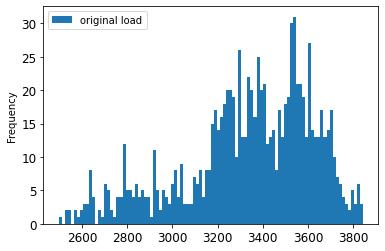

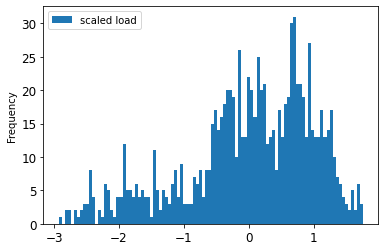

In [21]:
stlf_data[(stlf_data.index >=4993) & (stlf_data.index <=5953)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4993) & (valid.index <=5953)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4993,0.404005,-0.330089,0.293072,-1.661325,-1.225909,-1.531322,0.615827,0.447134,0.593074,0.337186,2.024775,1.733653,0.555596,0.473714
4994,0.473714,-0.366296,0.355110,-1.661325,-1.225909,-1.531322,1.070831,0.334665,0.547114,0.126364,1.626275,1.556706,0.551035,0.480685
4995,0.480685,-0.402502,0.417149,-1.661325,-1.225909,-1.531322,0.619327,0.397929,0.504688,-0.024223,1.585307,1.445153,0.550731,0.383092
4996,0.383092,-0.438708,0.479187,-1.516862,-1.225909,-1.531322,0.549326,0.426046,0.518830,-0.125870,1.499648,1.364373,0.540697,0.247159
4997,0.247159,-0.474915,0.541225,-1.516862,-1.225909,-1.531322,0.409325,0.622867,0.455192,-0.167281,1.268742,1.260513,0.524278,0.358694
4998,0.358694,-0.511121,0.603264,-1.516862,-1.225909,-1.531322,0.479326,1.079772,0.342058,-0.095752,1.183083,1.283593,0.527318,0.421432
4999,0.421432,-0.547327,0.665302,-1.516862,-1.225909,-1.531322,0.486326,0.626382,0.405696,-0.167281,1.235223,1.156653,0.530359,0.299441
5000,0.299441,-0.583534,0.727341,-1.372399,-1.225909,-1.531322,0.388325,0.556088,0.433979,-0.242575,1.183083,1.064333,0.520325,0.229732
5001,0.229732,-0.619740,0.789379,-1.372399,-1.225909,-1.531322,0.251824,0.415502,0.631964,-0.197399,1.067629,1.048946,0.487182,0.414461
5002,0.414461,-0.655946,0.851417,-1.372399,-1.225909,-1.531322,0.363825,0.485795,1.091572,-0.159752,1.108597,1.129726,0.430625,0.477200


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
4993,0.404005,-0.330089,0.293072,-1.661325,-1.225909,-1.531322,0.615827,0.447134,0.593074,0.337186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.404005
4994,0.473714,-0.366296,0.355110,-1.661325,-1.225909,-1.531322,1.070831,0.334665,0.547114,0.126364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.404005,0.473714
4995,0.480685,-0.402502,0.417149,-1.661325,-1.225909,-1.531322,0.619327,0.397929,0.504688,-0.024223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.404005,0.473714,0.480685
4996,0.383092,-0.438708,0.479187,-1.516862,-1.225909,-1.531322,0.549326,0.426046,0.518830,-0.125870,...,NaN,NaN,NaN,NaN,NaN,NaN,0.404005,0.473714,0.480685,0.383092
4997,0.247159,-0.474915,0.541225,-1.516862,-1.225909,-1.531322,0.409325,0.622867,0.455192,-0.167281,...,NaN,NaN,NaN,NaN,NaN,0.404005,0.473714,0.480685,0.383092,0.247159
4998,0.358694,-0.511121,0.603264,-1.516862,-1.225909,-1.531322,0.479326,1.079772,0.342058,-0.095752,...,NaN,NaN,NaN,NaN,0.404005,0.473714,0.480685,0.383092,0.247159,0.358694
4999,0.421432,-0.547327,0.665302,-1.516862,-1.225909,-1.531322,0.486326,0.626382,0.405696,-0.167281,...,NaN,NaN,NaN,0.404005,0.473714,0.480685,0.383092,0.247159,0.358694,0.421432
5000,0.299441,-0.583534,0.727341,-1.372399,-1.225909,-1.531322,0.388325,0.556088,0.433979,-0.242575,...,NaN,NaN,0.404005,0.473714,0.480685,0.383092,0.247159,0.358694,0.421432,0.299441
5001,0.229732,-0.619740,0.789379,-1.372399,-1.225909,-1.531322,0.251824,0.415502,0.631964,-0.197399,...,NaN,0.404005,0.473714,0.480685,0.383092,0.247159,0.358694,0.421432,0.299441,0.229732
5002,0.414461,-0.655946,0.851417,-1.372399,-1.225909,-1.531322,0.363825,0.485795,1.091572,-0.159752,...,0.404005,0.473714,0.480685,0.383092,0.247159,0.358694,0.421432,0.299441,0.229732,0.414461


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5003,0.477200,-0.692152,0.913456,-1.372399,-1.225909,-1.531322,0.426825,0.492825,0.635500,-0.201164,...,0.473714,0.480685,0.383092,0.247159,0.358694,0.421432,0.299441,0.229732,0.414461,0.477200
5004,0.553880,-0.728359,0.975494,-1.227936,-1.225909,-1.531322,0.304324,0.394414,0.564791,-0.291516,...,0.480685,0.383092,0.247159,0.358694,0.421432,0.299441,0.229732,0.414461,0.477200,0.553880
5005,0.372636,-0.728359,0.975494,-1.227936,-1.225909,-1.531322,0.234323,0.257343,0.423373,-0.381868,...,0.383092,0.247159,0.358694,0.421432,0.299441,0.229732,0.414461,0.477200,0.553880,0.372636
5006,0.180935,-0.728359,0.975494,-1.227936,-1.225909,-1.531322,0.419825,0.369812,0.494082,-0.404456,...,0.247159,0.358694,0.421432,0.299441,0.229732,0.414461,0.477200,0.553880,0.372636,0.180935
5007,0.184421,-0.728359,0.975494,-1.227936,-1.225909,-1.531322,0.482826,0.433075,0.501153,-0.438339,...,0.358694,0.421432,0.299441,0.229732,0.414461,0.477200,0.553880,0.372636,0.180935,0.184421


In [25]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
5003,0.553880
5004,0.372636
5005,0.180935
5006,0.184421
5007,0.194877
...,...
5947,1.160350
5948,1.306739
5949,1.763334
5950,1.693625


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
5003,0.477200,0.477200,0.414461,0.229732,0.299441,0.421432,0.358694,0.247159,0.383092,0.480685,...,-1.372399,-1.225909,-1.531322,0.426825,0.492825,0.635500,-0.201164,1.153288,1.064333,0.418767
5004,0.553880,0.553880,0.477200,0.414461,0.229732,0.299441,0.421432,0.358694,0.247159,0.383092,...,-1.227936,-1.225909,-1.531322,0.304324,0.394414,0.564791,-0.291516,1.060181,1.148959,0.419679
5005,0.372636,0.372636,0.553880,0.477200,0.414461,0.229732,0.299441,0.421432,0.358694,0.247159,...,-1.227936,-1.225909,-1.531322,0.234323,0.257343,0.423373,-0.381868,0.918657,0.948933,0.416943
5006,0.180935,0.180935,0.372636,0.553880,0.477200,0.414461,0.229732,0.299441,0.421432,0.358694,...,-1.227936,-1.225909,-1.531322,0.419825,0.369812,0.494082,-0.404456,0.818101,0.979706,0.391401
5007,0.184421,0.184421,0.180935,0.372636,0.553880,0.477200,0.414461,0.229732,0.299441,0.421432,...,-1.227936,-1.225909,-1.531322,0.482826,0.433075,0.501153,-0.438339,0.847895,0.983553,0.365555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,1.108068,1.108068,1.285826,1.589061,1.575120,1.596032,1.721509,1.686654,1.711053,1.672713,...,1.516862,-0.204761,0.653030,1.606336,1.694838,1.243596,1.556944,-0.414643,0.141133,1.577256
5948,1.160350,1.160350,1.108068,1.285826,1.589061,1.575120,1.596032,1.721509,1.686654,1.711053,...,1.661325,-0.204761,0.653030,1.585336,1.733499,1.275415,1.342357,-0.369951,0.214219,1.569959
5949,1.306739,1.306739,1.160350,1.108068,1.285826,1.589061,1.575120,1.596032,1.721509,1.686654,...,1.661325,-0.204761,0.653030,1.599336,1.708896,1.356730,1.462827,-0.112974,0.194986,1.568438
5950,1.763334,1.763334,1.306739,1.160350,1.108068,1.285826,1.589061,1.575120,1.596032,1.721509,...,1.661325,-0.204761,0.653030,1.294833,1.744043,1.533503,1.967294,0.117932,0.733519,1.591547


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(949, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(949,24,1)
print(X_valid.shape)

(949, 24, 1)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(Conv1D(filters=128, kernel_size=1, padding='causal',activation='relu', dilation_rate=1,input_shape=(24,1)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
model.add(Conv1D(filters=128, kernel_size=2, padding='causal',activation='relu', dilation_rate=2))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(Conv1D(filters=512, kernel_size=1, activation='relu')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add(Bidirectional(LSTM(128,activation='linear')))
#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 24, 128)           256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 24, 128)           32896     
_________________________________________________________________
time_distributed (TimeDistri (None, 24, 128)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 296,577
Trainable params: 296,577
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:

history = model.fit(X_train,
          y_train,
          batch_size=300,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )


Epoch 1/300
17/17 [==============================] - 8s 463ms/step - loss: 0.4450 - val_loss: 0.1314
Epoch 2/300
17/17 [==============================] - 7s 406ms/step - loss: 0.0932 - val_loss: 0.0513
Epoch 3/300
17/17 [==============================] - 7s 393ms/step - loss: 0.0507 - val_loss: 0.0276
Epoch 4/300
17/17 [==============================] - 7s 392ms/step - loss: 0.0428 - val_loss: 0.0254
Epoch 5/300
17/17 [==============================] - 7s 386ms/step - loss: 0.0402 - val_loss: 0.0239
Epoch 6/300
17/17 [==============================] - 7s 390ms/step - loss: 0.0394 - val_loss: 0.0238
Epoch 7/300
17/17 [==============================] - 7s 389ms/step - loss: 0.0381 - val_loss: 0.0233
Epoch 8/300
17/17 [==============================] - 7s 390ms/step - loss: 0.0383 - val_loss: 0.0225
Epoch 9/300
17/17 [==============================] - 7s 422ms/step - loss: 0.0374 - val_loss: 0.0245
Epoch 10/300
17/17 [==============================] - 7s 388ms/step - loss: 0.0381 - val_lo

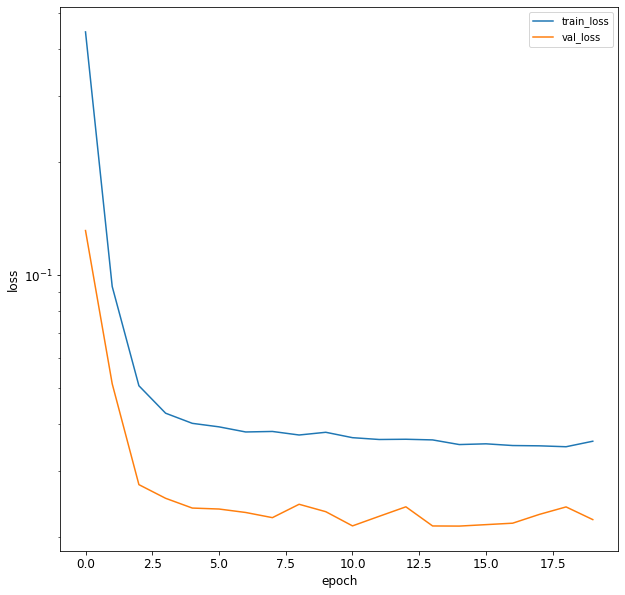

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[stlf_data.index >= 5994][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5994,3767.0,39.072453,37.605445,11.0,2.0,1.0,3698.0,3677.0,3521.0,3260.0,3711.0,3795.0,3692.416667
5995,3753.0,39.142452,37.372050,11.0,2.0,1.0,3700.0,3744.0,3523.0,3270.0,3771.0,3799.0,3711.583333
5996,3732.0,39.142452,37.372050,12.0,2.0,1.0,3728.0,3802.0,3578.0,3259.0,3794.0,3789.0,3724.416667
5997,3743.0,39.142452,37.372050,12.0,2.0,1.0,3742.0,3719.0,3631.0,3255.0,3760.0,3812.0,3733.750000
5998,3694.0,39.397451,36.944630,12.0,2.0,1.0,3767.0,3698.0,3677.0,3293.0,3732.0,3872.0,3735.166667
5999,3668.0,39.652450,36.517210,12.0,2.0,1.0,3753.0,3700.0,3744.0,3373.0,3753.0,3898.0,3728.833333
6000,3752.0,39.652450,36.517210,13.0,2.0,1.0,3732.0,3728.0,3802.0,3390.0,3769.0,3885.0,3724.666667
6001,3777.0,39.652450,36.517210,13.0,2.0,1.0,3743.0,3742.0,3719.0,3360.0,3808.0,3875.0,3729.500000
6002,3787.0,40.427450,34.553190,13.0,2.0,1.0,3694.0,3767.0,3698.0,3443.0,3811.0,3917.0,3736.916667
6003,3808.0,41.202450,32.589170,13.0,2.0,1.0,3668.0,3753.0,3700.0,3452.0,3828.0,3922.0,3745.916667


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2838 entries, 5994 to 8831
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2838 non-null   float64
 1   Temp    2838 non-null   float64
 2   Hum     2838 non-null   float64
 3   A       2838 non-null   float64
 4   B       2838 non-null   float64
 5   C       2838 non-null   float64
 6   D       2838 non-null   float64
 7   E       2838 non-null   float64
 8   F       2838 non-null   float64
 9   G       2838 non-null   float64
 10  H       2838 non-null   float64
 11  I       2838 non-null   float64
 12  J       2838 non-null   float64
dtypes: float64(13)
memory usage: 310.4 KB


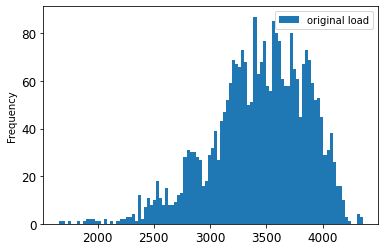

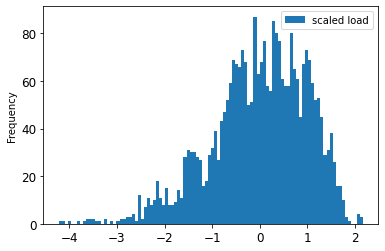

In [36]:
stlf_data[stlf_data.index >= 5994][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5994][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5994,0.774235,2.055301,-2.166301,-0.231364,-0.977174,0.661581,0.611175,0.561679,0.192951,-0.424056,0.616102,0.773040,0.624614,0.741104
5995,0.741104,2.074013,-2.181371,-0.231364,-0.977174,0.661581,0.615908,0.720272,0.197686,-0.400393,0.758476,0.782729,0.671992,0.691407
5996,0.691407,2.074013,-2.181371,-0.086736,-0.977174,0.661581,0.682179,0.857561,0.327903,-0.426422,0.813053,0.758507,0.703715,0.717439
5997,0.717439,2.074013,-2.181371,-0.086736,-0.977174,0.661581,0.715314,0.661095,0.453385,-0.435887,0.732374,0.814217,0.726786,0.601479
5998,0.601479,2.142179,-2.208969,-0.086736,-0.977174,0.661581,0.774484,0.611387,0.562294,-0.345969,0.665933,0.959546,0.730288,0.539949
5999,0.539949,2.210346,-2.236567,-0.086736,-0.977174,0.661581,0.741349,0.616121,0.720923,-0.156667,0.715764,1.022522,0.714633,0.738737
6000,0.738737,2.210346,-2.236567,0.057892,-0.977174,0.661581,0.691646,0.682399,0.858242,-0.116440,0.753730,0.991034,0.704333,0.797901
6001,0.797901,2.210346,-2.236567,0.057892,-0.977174,0.661581,0.717681,0.715537,0.661733,-0.187429,0.846274,0.966813,0.716281,0.821566
6002,0.821566,2.417519,-2.363382,0.057892,-0.977174,0.661581,0.601707,0.774714,0.612014,0.008972,0.853393,1.068543,0.734614,0.871263
6003,0.871263,2.624692,-2.490197,0.057892,-0.977174,0.661581,0.540170,0.741575,0.616749,0.030268,0.893732,1.080654,0.756861,0.970657


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5994,0.774235,2.055301,-2.166301,-0.231364,-0.977174,0.661581,0.611175,0.561679,0.192951,-0.424056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.774235
5995,0.741104,2.074013,-2.181371,-0.231364,-0.977174,0.661581,0.615908,0.720272,0.197686,-0.400393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.774235,0.741104
5996,0.691407,2.074013,-2.181371,-0.086736,-0.977174,0.661581,0.682179,0.857561,0.327903,-0.426422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.774235,0.741104,0.691407
5997,0.717439,2.074013,-2.181371,-0.086736,-0.977174,0.661581,0.715314,0.661095,0.453385,-0.435887,...,NaN,NaN,NaN,NaN,NaN,NaN,0.774235,0.741104,0.691407,0.717439
5998,0.601479,2.142179,-2.208969,-0.086736,-0.977174,0.661581,0.774484,0.611387,0.562294,-0.345969,...,NaN,NaN,NaN,NaN,NaN,0.774235,0.741104,0.691407,0.717439,0.601479
5999,0.539949,2.210346,-2.236567,-0.086736,-0.977174,0.661581,0.741349,0.616121,0.720923,-0.156667,...,NaN,NaN,NaN,NaN,0.774235,0.741104,0.691407,0.717439,0.601479,0.539949
6000,0.738737,2.210346,-2.236567,0.057892,-0.977174,0.661581,0.691646,0.682399,0.858242,-0.116440,...,NaN,NaN,NaN,0.774235,0.741104,0.691407,0.717439,0.601479,0.539949,0.738737
6001,0.797901,2.210346,-2.236567,0.057892,-0.977174,0.661581,0.717681,0.715537,0.661733,-0.187429,...,NaN,NaN,0.774235,0.741104,0.691407,0.717439,0.601479,0.539949,0.738737,0.797901
6002,0.821566,2.417519,-2.363382,0.057892,-0.977174,0.661581,0.601707,0.774714,0.612014,0.008972,...,NaN,0.774235,0.741104,0.691407,0.717439,0.601479,0.539949,0.738737,0.797901,0.821566
6003,0.871263,2.624692,-2.490197,0.057892,-0.977174,0.661581,0.540170,0.741575,0.616749,0.030268,...,0.774235,0.741104,0.691407,0.717439,0.601479,0.539949,0.738737,0.797901,0.821566,0.871263


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
6004,0.970657,2.624692,-2.490197,0.202520,-0.977174,0.661581,0.738982,0.691867,0.683041,-0.009958,...,0.741104,0.691407,0.717439,0.601479,0.539949,0.738737,0.797901,0.821566,0.871263,0.970657
6005,0.875996,2.624692,-2.490197,0.202520,-0.977174,0.661581,0.798152,0.717905,0.716187,0.051565,...,0.691407,0.717439,0.601479,0.539949,0.738737,0.797901,0.821566,0.871263,0.970657,0.875996
6006,0.970657,2.736966,-2.535924,0.202520,-0.977174,0.661581,0.821820,0.601919,0.775377,0.129652,...,0.717439,0.601479,0.539949,0.738737,0.797901,0.821566,0.871263,0.970657,0.875996,0.970657
6007,1.138680,2.849240,-2.581651,0.202520,-0.977174,0.661581,0.871523,0.540376,0.742231,0.174611,...,0.601479,0.539949,0.738737,0.797901,0.821566,0.871263,0.970657,0.875996,0.970657,1.138680
6008,1.003788,2.849240,-2.581651,0.347148,-0.977174,0.661581,0.970929,0.739208,0.692512,0.226669,...,0.539949,0.738737,0.797901,0.821566,0.871263,0.970657,0.875996,0.970657,1.138680,1.003788


In [40]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
6004,0.875996
6005,0.970657
6006,1.138680
6007,1.003788
6008,0.930426
...,...
8826,0.861797
8827,0.752937
8828,0.622778
8829,0.797901


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
6004,0.970657,0.970657,0.871263,0.821566,0.797901,0.738737,0.539949,0.601479,0.717439,0.691407,...,0.202520,-0.977174,0.661581,0.738982,0.691867,0.683041,-0.009958,0.948309,1.054010,0.781992
6005,0.875996,0.875996,0.970657,0.871263,0.821566,0.797901,0.738737,0.539949,0.601479,0.717439,...,0.202520,-0.977174,0.661581,0.798152,0.717905,0.716187,0.051565,0.644577,0.898992,0.796000
6006,0.970657,0.970657,0.875996,0.970657,0.871263,0.821566,0.797901,0.738737,0.539949,0.601479,...,0.202520,-0.977174,0.661581,0.821820,0.601919,0.775377,0.129652,0.879495,0.741552,0.813097
6007,1.138680,1.138680,0.970657,0.875996,0.970657,0.871263,0.821566,0.797901,0.738737,0.539949,...,0.202520,-0.977174,0.661581,0.871523,0.540376,0.742231,0.174611,0.896105,0.855393,0.847704
6008,1.003788,1.003788,1.138680,0.970657,0.875996,0.970657,0.871263,0.821566,0.797901,0.738737,...,0.347148,-0.977174,0.661581,0.970929,0.739208,0.692512,0.226669,0.635085,0.874771,0.874895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,0.826299,0.826299,0.757670,0.774235,0.774235,0.646443,0.592013,0.542316,0.603846,0.440555,...,1.504173,-0.470372,0.661581,0.646677,0.440959,0.233200,0.470395,-0.845609,-0.643922,0.625850
8827,0.861797,0.861797,0.826299,0.757670,0.774235,0.774235,0.646443,0.592013,0.542316,0.603846,...,1.504173,-0.470372,0.661581,0.774484,0.604286,0.391828,0.470395,-0.810016,-0.583368,0.666843
8828,0.752937,0.752937,0.861797,0.826299,0.757670,0.774235,0.774235,0.646443,0.592013,0.542316,...,1.648801,-0.470372,0.661581,0.774484,0.542743,0.441547,0.517720,-0.779168,-0.607590,0.694034
8829,0.622778,0.622778,0.752937,0.861797,0.826299,0.757670,0.774235,0.774235,0.646443,0.592013,...,1.648801,-0.470372,0.661581,0.757916,0.592451,0.398931,0.505889,-0.798151,-0.539769,0.713603


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2827, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2827, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2827,24,1)

In [45]:
predictions = model.predict(X_test)
predictions

array([[0.923582  ],
       [0.8277346 ],
       [0.9527794 ],
       ...,
       [0.71958774],
       [0.59009343],
       [0.8005342 ]], dtype=float32)

In [46]:
feature=stlf_data.copy()[stlf_data.index >= 5994][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3439.838795
dtype: float64
Cons    422.634878
dtype: float64


In [47]:
load_mean=3439.838795
load_std=422.634878
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+1
6004,3810.065232
6005,3850.072281
6006,3921.084794
6007,3864.074749
6008,3833.069286
...,...
8826,3804.064175
8827,3758.056069
8828,3703.046376
8829,3777.059417


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[3830.1768],
       [3789.6685],
       [3842.5166],
       ...,
       [3743.9617],
       [3689.233 ],
       [3778.1726]], dtype=float32)

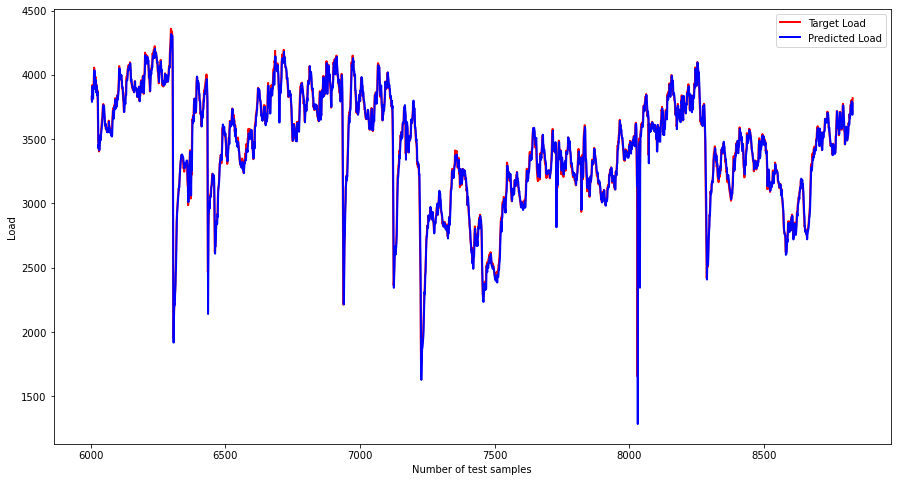

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.2279966908545614


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1    0.085045
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
6004  380905.995382
6005  384908.797042
6006  392010.483087
6007  386306.202282
6008  383206.554962
...             ...
8826  380307.017936
8827  375704.657532
8828  370203.532700
8829  377608.266948
8830  381807.752629

[2827 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+1
6004   404.473457
6005  3648.622000
6006  6172.960785
6007  2418.013265
6008   205.065801
...           ...
8826   521.712672
8827  1272.784766
8828  1674.061269
8829  7713.495281
8830  1672.336490

[2827 rows x 1 columns]
y_t+1    6596.099714
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    81.216376
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,2827):
    b=a[i]
    print(b)

[3830.1768]
[3789.6685]
[3842.5166]
[3913.248]
[3847.3894]
[3814.0972]
[3909.283]
[3888.4583]
[3910.957]
[3960.584]
[4034.927]
[3990.337]
[3948.5374]
[3960.6318]
[3947.662]
[3960.4138]
[3864.252]
[3879.003]
[3916.7156]
[3868.92]
[3840.835]
[3842.229]
[3868.7717]
[3788.0059]
[3618.838]
[3427.51]
[3459.3462]
[3441.439]
[3412.8118]
[3427.3518]
[3452.8555]
[3492.422]
[3528.116]
[3491.9375]
[3518.3848]
[3540.2053]
[3566.0754]
[3580.4658]
[3609.2747]
[3646.8755]
[3656.4397]
[3708.8494]
[3745.5332]
[3764.3384]
[3760.7988]
[3755.222]
[3752.0703]
[3701.2683]
[3675.4778]
[3632.8574]
[3603.3152]
[3615.2283]
[3619.0315]
[3579.3228]
[3591.6753]
[3588.7373]
[3569.2761]
[3554.0571]
[3569.3577]
[3553.034]
[3562.731]
[3554.6274]
[3569.7002]
[3593.0684]
[3635.5767]
[3596.623]
[3592.146]
[3580.051]
[3561.3225]
[3553.5295]
[3544.6755]
[3572.574]
[3549.4104]
[3525.659]
[3543.5789]
[3520.033]
[3530.9116]
[3625.1753]
[3664.356]
[3691.507]
[3721.3418]
[3695.0215]
[3659.3618]
[3714.249]
[3752.5945]
[3730.6846]

[3497.3052]
[3536.6047]
[3613.6794]
[3525.1611]
[3596.9736]
[3597.7397]
[3530.8184]
[3563.1172]
[3526.326]
[3519.4717]
[3487.008]
[3548.0679]
[3544.4795]
[3482.4446]
[3569.1462]
[3625.0972]
[3603.9954]
[3603.9668]
[3562.0076]
[3623.7139]
[3620.7021]
[3588.9626]
[3557.0576]
[3631.4734]
[3718.594]
[3754.4495]
[3825.617]
[3847.9968]
[3884.8193]
[3899.8198]
[3863.9126]
[3926.522]
[3877.5652]
[3935.0535]
[3917.078]
[3894.6873]
[3876.2554]
[3858.206]
[3841.925]
[3822.72]
[3772.8503]
[3801.6873]
[3752.3096]
[3689.4827]
[3630.5361]
[3684.8662]
[3735.4565]
[3764.0662]
[3745.0776]
[3720.9314]
[3720.6836]
[3781.2263]
[3819.8894]
[3794.3594]
[3871.9517]
[3923.2783]
[3923.5957]
[3952.533]
[3928.7966]
[3946.3706]
[3948.9604]
[3992.6753]
[4067.7883]
[4010.401]
[4019.4307]
[4005.7915]
[4023.346]
[4012.6519]
[3982.0837]
[3932.6248]
[3900.9329]
[3889.4429]
[3897.8804]
[3881.4346]
[3828.2998]
[3826.3613]
[3753.2483]
[3771.1492]
[3745.2053]
[3731.7632]
[3740.019]
[3733.39]
[3738.279]
[3738.1736]
[3770.874

[3292.3384]
[3291.8442]
[3268.502]
[3207.0981]
[3225.5535]
[3245.3]
[3228.7102]
[3202.469]
[3206.9094]
[3208.2458]
[3180.9004]
[3222.8772]
[3230.3794]
[3205.804]
[3146.293]
[3096.0022]
[3079.909]
[3037.494]
[3018.726]
[3041.2463]
[3107.102]
[3115.0662]
[3067.6162]
[3091.745]
[3080.3623]
[3068.687]
[3073.7744]
[3131.4333]
[3178.5352]
[3176.813]
[3179.6104]
[3147.0452]
[3135.9077]
[3145.1]
[3182.9104]
[3222.3416]
[3221.577]
[3241.138]
[3192.935]
[3193.83]
[3168.0845]
[3170.2783]
[3127.8691]
[3120.9602]
[3088.558]
[3095.2937]
[3058.892]
[3055.192]
[3033.2456]
[3014.4507]
[3005.4329]
[2980.0945]
[2967.613]
[2987.1035]
[2980.2402]
[3007.827]
[2983.4438]
[2988.7568]
[2961.9255]
[2948.8093]
[2965.9763]
[2975.0547]
[2986.392]
[2967.579]
[2978.0278]
[3013.6602]
[3015.4229]
[2966.7751]
[2996.2092]
[3037.9915]
[3084.5989]
[3170.0408]
[3175.7727]
[3241.9482]
[3253.8652]
[3170.1802]
[3177.8247]
[3208.3306]
[3191.0674]
[3225.678]
[3258.304]
[3244.4543]
[3266.4797]
[3322.223]
[3371.034]
[3369.7378]
[

[3666.7205]
[3641.787]
[3616.4717]
[3617.803]
[3643.154]
[3643.8845]
[3601.0847]
[3679.38]
[3753.509]
[3711.043]
[3754.6653]
[3759.5452]
[3766.5432]
[3709.387]
[3639.8457]
[3565.5115]
[3493.019]
[3315.6365]
[3175.7434]
[3056.0217]
[2819.6125]
[2548.9253]
[2407.5176]
[2526.8352]
[2550.9653]
[2522.0713]
[2522.128]
[2592.958]
[2699.2214]
[2750.5012]
[2791.1758]
[2820.5842]
[2913.4863]
[2906.7312]
[2954.011]
[3040.6729]
[3094.4404]
[3073.9756]
[3079.7312]
[3095.384]
[3152.5264]
[3157.7544]
[3172.6296]
[3164.3748]
[3204.4514]
[3232.1482]
[3266.6145]
[3336.4907]
[3355.8904]
[3379.7424]
[3384.346]
[3412.4756]
[3429.4917]
[3420.3096]
[3369.8364]
[3363.78]
[3333.5]
[3371.8733]
[3328.8567]
[3301.7278]
[3309.9453]
[3306.1687]
[3246.2473]
[3224.168]
[3207.561]
[3216.399]
[3189.0757]
[3240.0237]
[3269.827]
[3246.537]
[3241.553]
[3232.3525]
[3289.8533]
[3277.9639]
[3322.1099]
[3379.9614]
[3410.5662]
[3424.0874]
[3413.0068]
[3418.7532]
[3438.3796]
[3427.8667]
[3395.5837]
[3466.0732]
[3479.851]
[3477.